In [5]:
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import json
import random
import matplotlib.pyplot as plt

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/aravinth/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
stopwords = set(stopwords.words('English'))

In [12]:
def preprocess_text(text):
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stopwords]
    preprocessed_text = ' '.join(words)
    return preprocessed_text

In [13]:
paragraph=""

titles=[]
reviews=[]
name="Aravinth"
cloudtype="positive"
read=0
dintread=0

In [14]:
def read_file_to_list(file_path, encoding='utf-8'):
    with open(file_path, 'r', encoding=encoding) as file:
        data_list = file.read()
    return data_list

In [15]:
reviews=read_file_to_list('reviews.txt')
reviews=reviews.split(" ")
print("Length of reviews",len(reviews))

Length of reviews 33097


In [16]:
newreviews=[]
for i in reviews:
    if isinstance(i,list):
        for j in i:
            temp=j
            temp=temp.split(" ")
            for z in temp:
                newreviews.append(z)
    elif isinstance(i,str):
        try:
            newreviews.append(i)
        except:
            pass
    else:
        print(item, "is neither a list nor a string")

In [17]:
print("Review content",newreviews)

Review content ["[['I", 'would', 'like', 'to', 'share', 'my', 'experience', 'one', 'by', 'one.DELIVERY', 'EXPERIENCE', '-', 'Too', 'Fast', '(', 'Max', '2', 'Days', 'for', 'Mumbai', 'location', ')INSTALLATION', '-', 'Within', '6', 'Hrs', 'after', 'delivery', '(', 'In', '6', 'Hrs', 'during', 'Covid', 'Time)DELIVERY', 'FACILITY', '-', 'Shipped', 'in', '3rd', 'Floor', 'without', 'having', 'lift', '(', 'No', 'extra', 'pay)', 'At', 'your', 'doorPACKEGING', '-', 'Good', 'Packeging', 'with', 'extra', 'tharmocol', 'from', 'all', 'side', 'for', 'safety.', 'So', 'its', 'avoide', 'unnecessary', 'denting.', 'Keep', 'your', 'machine', 'safe', 'during', 'shipment.', '(', 'especially', 'in', 'Amazon', ')BUILD', 'QUALITY', '-', 'Superior', 'Quality', 'with', 'having', 'nice', 'color', 'Specially', 'Drum', '&', 'upper', 'glass', 'giving', 'premium', 'look.AUTOMATIC', 'FUNCTION', '-Wash', 'the', 'cloth', 'within', '40', 'Minutes.Automatic', 'Water', 'SupplyNo', 'error', 'in', 'System', 'Program', 'or', '

In [18]:
print("Total reviews",len(newreviews))

Total reviews 33097


In [19]:
nflag=0
rflag=0
reviewset=set(newreviews)

In [20]:
for i in reviewset:
    temp=random.randint(0,5)
    if((temp==1 or temp==4) and nflag<600):
        nflag+=1
        paragraph+=str(name)
    paragraph+=str(i)+str(" ")

In [21]:
def read_file_to_list(file_path):
    with open(file_path, 'r') as file:
        data_list = file.read().splitlines()
    return data_list

In [23]:
positive_words=read_file_to_list('positive_words.txt')
negative_words=read_file_to_list('negative_words.txt')
personpositive_words=read_file_to_list('personpositive_words.txt')
personnegative_words=read_file_to_list('personnegative_words.txt')

In [24]:
nflag=0
rflag=0

In [25]:
paragraph=paragraph.replace("good","")
reviewtype=[]
persontype=[]

In [26]:
if cloudtype=="positive":
    reviewtype=positive_words
    persontype=personpositive_words
else:
    reviewtype=negative_words
    persontype=personnegative_words

if cloudtype=="positive":
    for i in reviewtype:
        paragraph+=str(i)+str(" ")
        temp=random.randint(0,10)
        if(temp==0 or temp==5 or temp==9):
            paragraph+=str(name)+str(" ")
            paragraph+=str(i)+str(" ")
else:
    for j in range(4):
        for i in reviewtype:
            paragraph+=str(i)+str(" ")
            temp=random.randint(0,10)
            if(temp==0 or temp==5 or temp==9):
                paragraph+=str(name)+str(" ")
                paragraph+=str(i)+str(" ")

In [29]:
preprocessed_paragraph = preprocess_text(paragraph)
preprocessed_paragraph=preprocessed_paragraph.replace(name.lower(),name)
wordcloud = WordCloud(width=800, height=400).generate(preprocessed_paragraph)

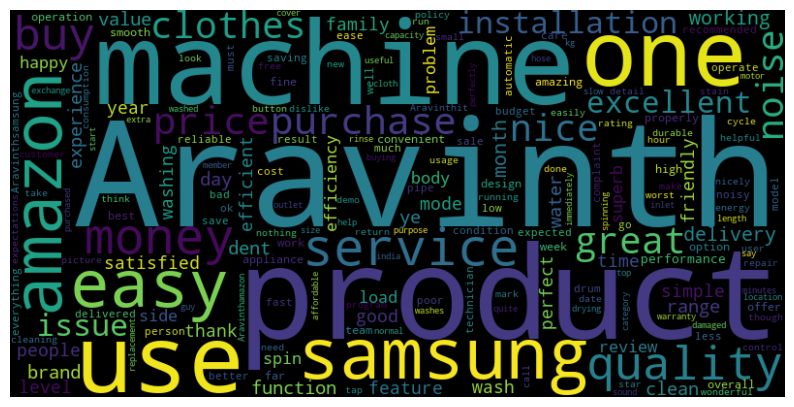

In [30]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()